In [1]:
pip install pandas seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('./balanza_latam.csv')
df.head()

,DATASET,SERIES_CODE,OBS_MEASURE,COUNTRY,BOP_ACCOUNTING_ENTRY,INDICATOR,UNIT,FREQUENCY,SCALE,1990,...,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024,2024-Q1,2024-Q2,2024-Q3,2024-Q4,2025-Q1
0,IMF.STA:BOP(21.0.0),PER.L_NIL_T.P_F3_S1Z_S.USD.Q,OBS_VALUE,Peru,"Liabilities, Net incurrence of liabilities","Portfolio investment, Debt securities, Other S...",US dollar,Quarterly,Millions,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
1,IMF.STA:BOP(21.0.0),PER.DB_T.D_F_D4P.USD.Q,OBS_VALUE,Peru,Debit/Expenditure,"Direct investment, Total financial assets/liab...",US dollar,Quarterly,Millions,NaN,...,4329.960291,3651.880988,3085.196529,3025.341674,NaN,3832.134145,4094.159007,4914.467125,4219.330875,NaN
2,IMF.STA:BOP(21.0.0),PER.L_T.O_FLA1_FEF41_S12R.USD.A,OBS_VALUE,Peru,Liabilities,"Other investment, Debt instruments other than ...",US dollar,Annual,Millions,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,IMF.STA:BOP(21.0.0),PER.L_T.P_F3_FEF52_S121.USD.A,OBS_VALUE,Peru,Liabilities,"Portfolio investment, Debt securities, Accumul...",US dollar,Annual,Millions,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,IMF.STA:BOP(21.0.0),PER.L_T.O_FLA1_FEF3_S122.USD.A,OBS_VALUE,Peru,Liabilities,"Other investment, Debt instruments other than ...",US dollar,Annual,Millions,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.columns)

Index(['DATASET', 'SERIES_CODE', 'OBS_MEASURE', 'COUNTRY',
       'BOP_ACCOUNTING_ENTRY', 'INDICATOR', 'UNIT', 'FREQUENCY', 'SCALE',
       '1990',
       ...
       '2023-Q1', '2023-Q2', '2023-Q3', '2023-Q4', '2024', '2024-Q1',
       '2024-Q2', '2024-Q3', '2024-Q4', '2025-Q1'],
      dtype='object', length=185)


In [30]:
# Load the data from the CSV file
try:
    df_raw = pd.read_csv('./balanza_latam.csv')
    print("File 'balanza_latam.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'balanza_latam.csv' not found. Please make sure the file is in the correct directory.")
    # You can stop execution here or create an empty DataFrame to avoid further errors
    df_raw = pd.DataFrame()


File 'balanza_latam.csv' loaded successfully.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

quarterly_columns = [col for col in df.columns if re.match(r'^\d{4}-Q[1-4]$', col)]
print(quarterly_columns)

['1990-Q1', '1990-Q2', '1990-Q3', '1990-Q4', '1991-Q1', '1991-Q2', '1991-Q3', '1991-Q4', '1992-Q1', '1992-Q2', '1992-Q3', '1992-Q4', '1993-Q1', '1993-Q2', '1993-Q3', '1993-Q4', '1994-Q1', '1994-Q2', '1994-Q3', '1994-Q4', '1995-Q1', '1995-Q2', '1995-Q3', '1995-Q4', '1996-Q1', '1996-Q2', '1996-Q3', '1996-Q4', '1997-Q1', '1997-Q2', '1997-Q3', '1997-Q4', '1998-Q1', '1998-Q2', '1998-Q3', '1998-Q4', '1999-Q1', '1999-Q2', '1999-Q3', '1999-Q4', '2000-Q1', '2000-Q2', '2000-Q3', '2000-Q4', '2001-Q1', '2001-Q2', '2001-Q3', '2001-Q4', '2002-Q1', '2002-Q2', '2002-Q3', '2002-Q4', '2003-Q1', '2003-Q2', '2003-Q3', '2003-Q4', '2004-Q1', '2004-Q2', '2004-Q3', '2004-Q4', '2005-Q1', '2005-Q2', '2005-Q3', '2005-Q4', '2006-Q1', '2006-Q2', '2006-Q3', '2006-Q4', '2007-Q1', '2007-Q2', '2007-Q3', '2007-Q4', '2008-Q1', '2008-Q2', '2008-Q3', '2008-Q4', '2009-Q1', '2009-Q2', '2009-Q3', '2009-Q4', '2010-Q1', '2010-Q2', '2010-Q3', '2010-Q4', '2011-Q1', '2011-Q2', '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3'

In [8]:
countries = df_raw['COUNTRY'].unique()
print(countries)

['Peru' 'Chile' 'Colombia' 'Uruguay' 'Bolivia' 'Brazil' 'Mexico'
 'Paraguay' 'Argentina']


In [34]:
# Define the indicators we need with shorter, more convenient names
indicator_map = {
    'Current Account': 'Current account balance excluding exceptional financing',
    'Capital Account': 'Capital account balance (credit less debit)',
    'Financial Account (non-reserve)': 'Financial account balance, excluding reserves and related items',
    'Net Errors & Omissions': 'Net errors and omissions',
    'Reserve Assets': 'Reserves and Related items, Net (net acquisition of financial assets less net incurrence of liabilities)'
}
series_codes_to_keep = [
    'ARG.NETCD_T.CABXEF.USD.A', # Current Account
    'ARG.NETCD_T.KAB.USD.A',    # Capital Account
    'ARG.NNAFANIL_T.FABXRRI.USD.A', # Financial Account (non-reserve)
    'ARG.NETCD_T.EO.USD.A',     # Net Errors and Omissions
    'ARG.NNAFANIL_T.RUE.USD.A'  # Reserve Assets
]

df_filtered = df_raw[df_raw['SERIES_CODE'].isin(series_codes_to_keep)].copy()

df_filtered['Indicator_Short'] = df_filtered['INDICATOR'].map({v: k for k, v in indicator_map.items()})

In [32]:
df_filtered = df_filtered[df_filtered["COUNTRY"] == 'Argentina']

In [35]:
# Reshape the data from 'long' to 'wide' format
# First, melt the year columns into rows
year_cols = [col for col in df.columns if col.isdigit()]
df_melted = df_filtered.melt(
    id_vars=['Indicator_Short'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

# Pivot the data to get Years as the index and Indicators as columns
df_plot = df_melted.pivot_table(
    index='Year',
    columns='Indicator_Short',
    values='Value'
).dropna(how='all') # Drop years with no data


In [36]:
df_plot.index = df_plot.index.astype(int)
df_plot = df_plot.apply(pd.to_numeric, errors='coerce')

# --- 2. Calculate BOP Balances ---

# Define the components that make up the "above the line" balance
components = ['Current Account', 'Capital Account', 'Financial Account (non-reserve)', 'Net Errors & Omissions']

# Calculate the Overall Balance (sum of components)
df_plot['Overall Balance'] = df_plot[components].sum(axis=1)


In [37]:
df_plot['Financing (-Δ Reserves)'] = -1 * df_plot['Reserve Assets']


# --- 3. Create the Visualization ---

# Set a visually appealing style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 9))

# Define colors for the components
colors = {
    'Current Account': '#c0392b',      # Red
    'Capital Account': '#f39c12',      # Orange
    'Financial Account (non-reserve)': '#27ae60', # Green
    'Net Errors & Omissions': '#7f8c8d'  # Grey
}

KeyError: 'Reserve Assets'

In [9]:
def process_quarterly_data(df):
    """
    Process the quarterly data to create a long format suitable for time series analysis
    """
    # Select relevant columns
    id_cols = ['COUNTRY', 'SERIES_CODE', 'INDICATOR', 'UNIT', 'SCALE']
    
    # Melt the dataframe to long format
    df_melted = pd.melt(df, 
                       id_vars=id_cols,
                       value_vars=quarterly_columns,
                       var_name='Quarter', 
                       value_name='Value')
    
    # Clean the data
    df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')
    
    # Convert Quarter to datetime
    df_melted['Date'] = pd.to_datetime(df_melted['Quarter'])
    
    # Remove rows with missing values
    df_melted = df_melted.dropna(subset=['Value'])
    
    # Sort by country and date
    df_melted = df_melted.sort_values(['COUNTRY', 'Date'])
    
    return df_melted


processed_df = process_quarterly_data(df_raw)

print(f"\nProcessed data shape: {processed_df.shape}")
print(f"\nProcessed data sample:")
print(processed_df.head(10))


Processed data shape: (710564, 8)

Processed data sample:
         COUNTRY               SERIES_CODE  \
13007  Argentina  ARG.NNAFANIL_T.FAB.USD.Q   
13015  Argentina          ARG.DB_T.S.USD.Q   
13016  Argentina     ARG.NETCD_T.SCA.USD.Q   
13018  Argentina         ARG.CD_T.SL.USD.Q   
13019  Argentina        ARG.DB_T.IN1.USD.Q   
13020  Argentina    ARG.L_NIL_T.OXEF.USD.Q   
13032  Argentina        ARG.DB_T.SPX.USD.Q   
13034  Argentina   ARG.L_NIL_T.D1_FL.USD.Q   
13035  Argentina       ARG.A_T.R_AFR.USD.Q   
13037  Argentina         ARG.CD_T.SF.USD.Q   

                                               INDICATOR       UNIT     SCALE  \
13007  Financial account balance (assets less liabili...  US dollar  Millions   
13015                                           Services  US dollar  Millions   
13016                  All modes of transport; passenger  US dollar  Millions   
13018               Government goods and services n.i.e.  US dollar  Millions   
13019                        

In [10]:
print("\n=== DATA EXPLORATION ===")
print(f"Date range: {processed_df['Date'].min()} to {processed_df['Date'].max()}")
print(f"Number of countries: {processed_df['COUNTRY'].nunique()}")
print(f"Countries: {processed_df['COUNTRY'].unique()}")
print(f"\nValue statistics:")
print(processed_df['Value'].describe())



=== DATA EXPLORATION ===
Date range: 1990-01-01 00:00:00 to 2025-01-01 00:00:00
Number of countries: 9
Countries: ['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Mexico' 'Paraguay'
 'Peru' 'Uruguay']

Value statistics:
count    710564.000000
mean        350.709839
std        4369.093297
min      -52048.241233
25%           0.000000
50%           0.000000
75%          32.076488
max      202046.316454
Name: Value, dtype: float64


In [20]:
processed_df = processed_df[processed_df["COUNTRY"] == 'Argentina']

In [21]:
country_data_points = processed_df.groupby('COUNTRY')['Value'].count().sort_values(ascending=False)
print(f"\nData points per country:")
print(country_data_points)


Data points per country:
COUNTRY
Argentina    111689
Name: Value, dtype: int64


In [12]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [15]:
# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

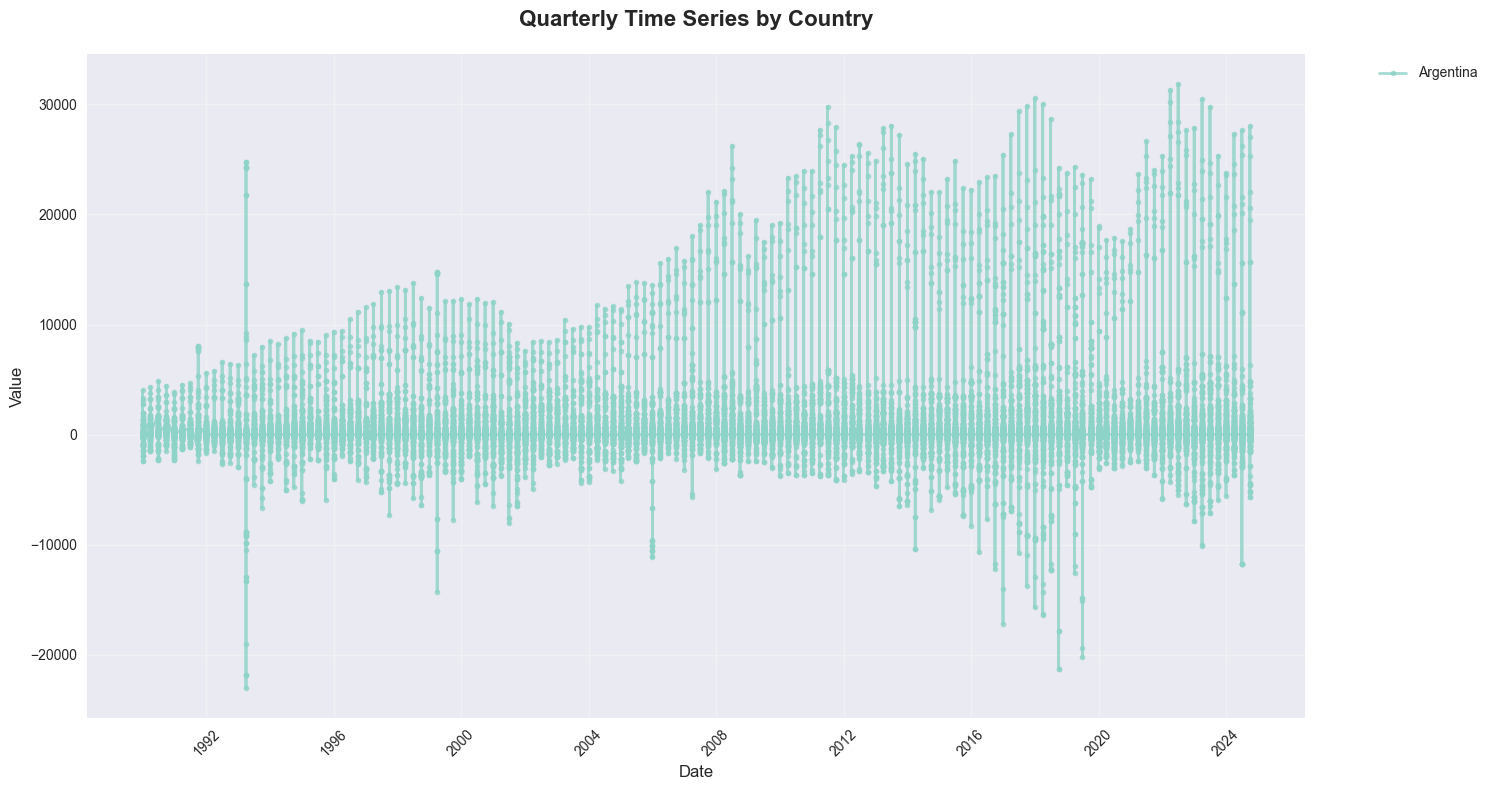

In [28]:
def create_main_timeseries(df, figsize=(15, 8)):
    """
    Create the main time series plot using matplotlib
    """
    plt.figure(figsize=figsize)
    
    countries = df['COUNTRY'].unique()
    colors = plt.cm.Set3(np.linspace(0, 1, len(countries)))
    
    for i, country in enumerate(countries):
        country_data = df[df['COUNTRY'] == country]
        plt.plot(country_data['Date'], country_data['Value'], 
                marker='o', markersize=4, linewidth=2, 
                label=country, color=colors[i], alpha=0.8)
    
    plt.title('Quarterly Time Series by Country', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create main plot
create_main_timeseries(processed_df)

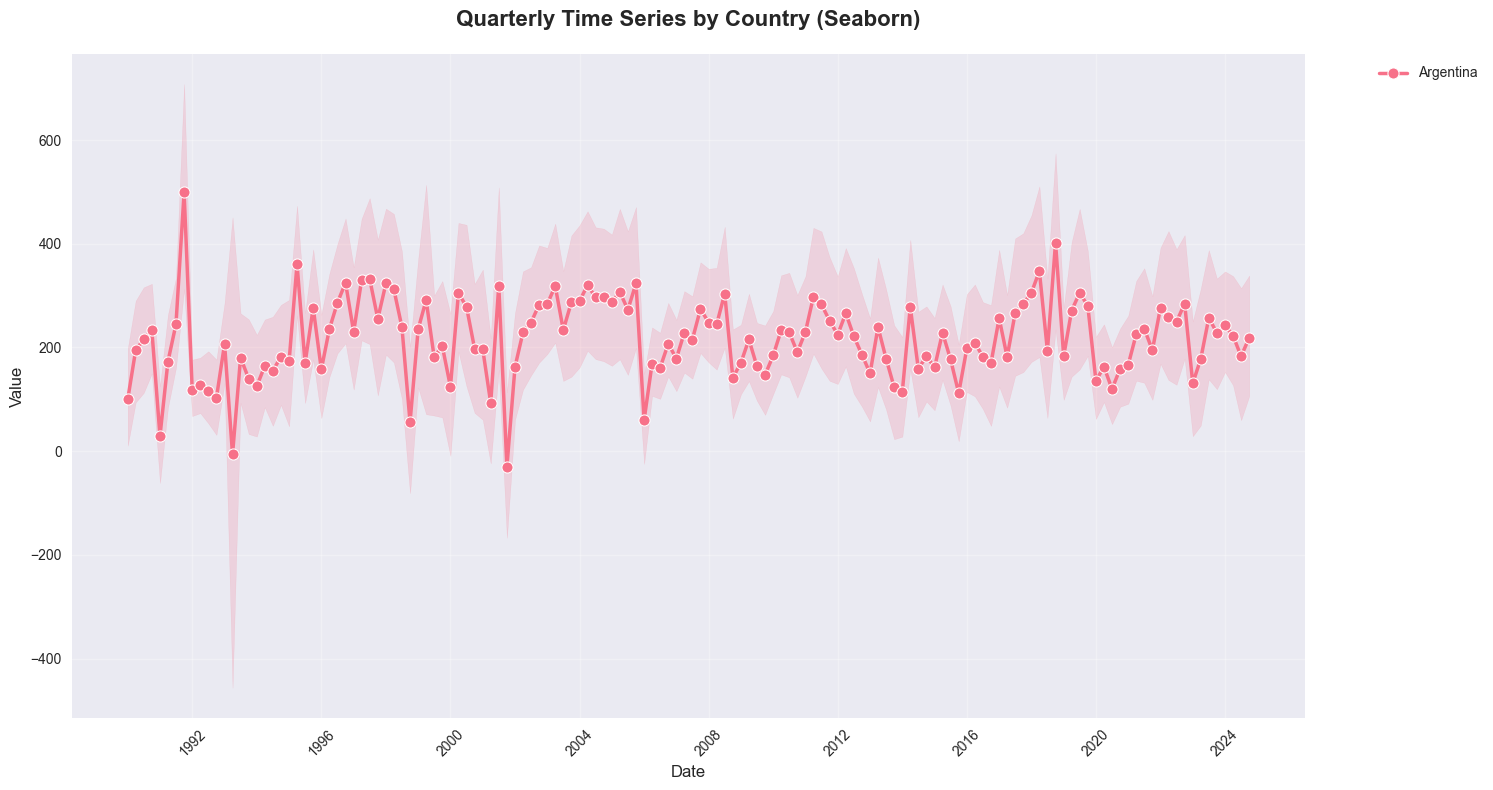

In [23]:
def create_seaborn_timeseries(df, figsize=(15, 8)):
    """
    Create time series plot using seaborn
    """
    plt.figure(figsize=figsize)
    
    # Use seaborn lineplot
    sns.lineplot(data=df, x='Date', y='Value', hue='COUNTRY', 
                marker='o', markersize=8, linewidth=2.5)
    
    plt.title('Quarterly Time Series by Country (Seaborn)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create seaborn plot
create_seaborn_timeseries(processed_df)


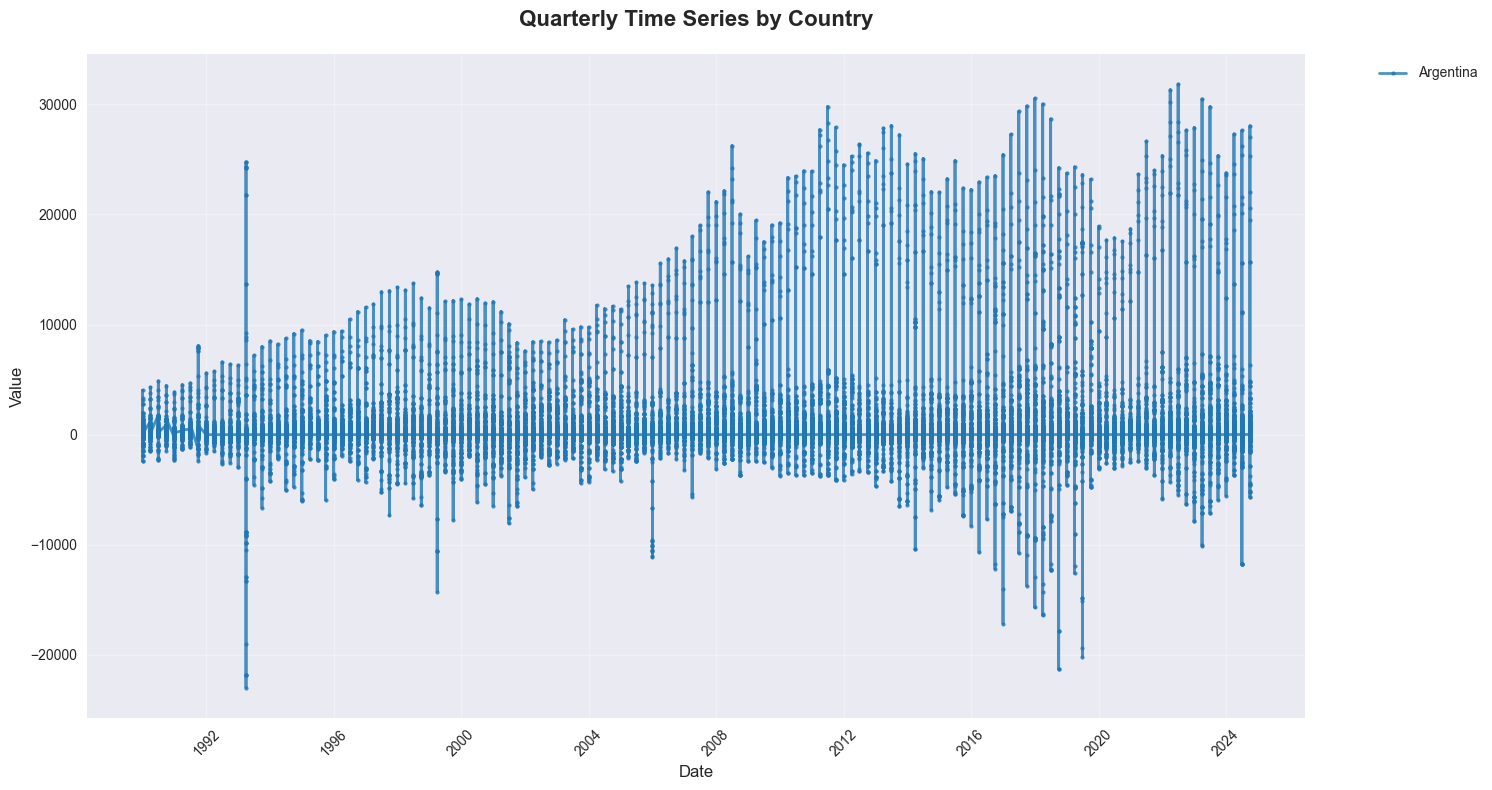

In [24]:
def create_static_timeseries(df, figsize=(15, 8)):
    """
    Create a static time series plot using matplotlib with enhanced styling
    """
    plt.figure(figsize=figsize)
    
    countries = df['COUNTRY'].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))
    
    for i, country in enumerate(countries):
        country_data = df[df['COUNTRY'] == country]
        plt.plot(country_data['Date'], country_data['Value'], 
                marker='o', markersize=3, linewidth=2, 
                label=country, color=colors[i], alpha=0.8)
    
    plt.title('Quarterly Time Series by Country', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create static plot
create_static_timeseries(processed_df)


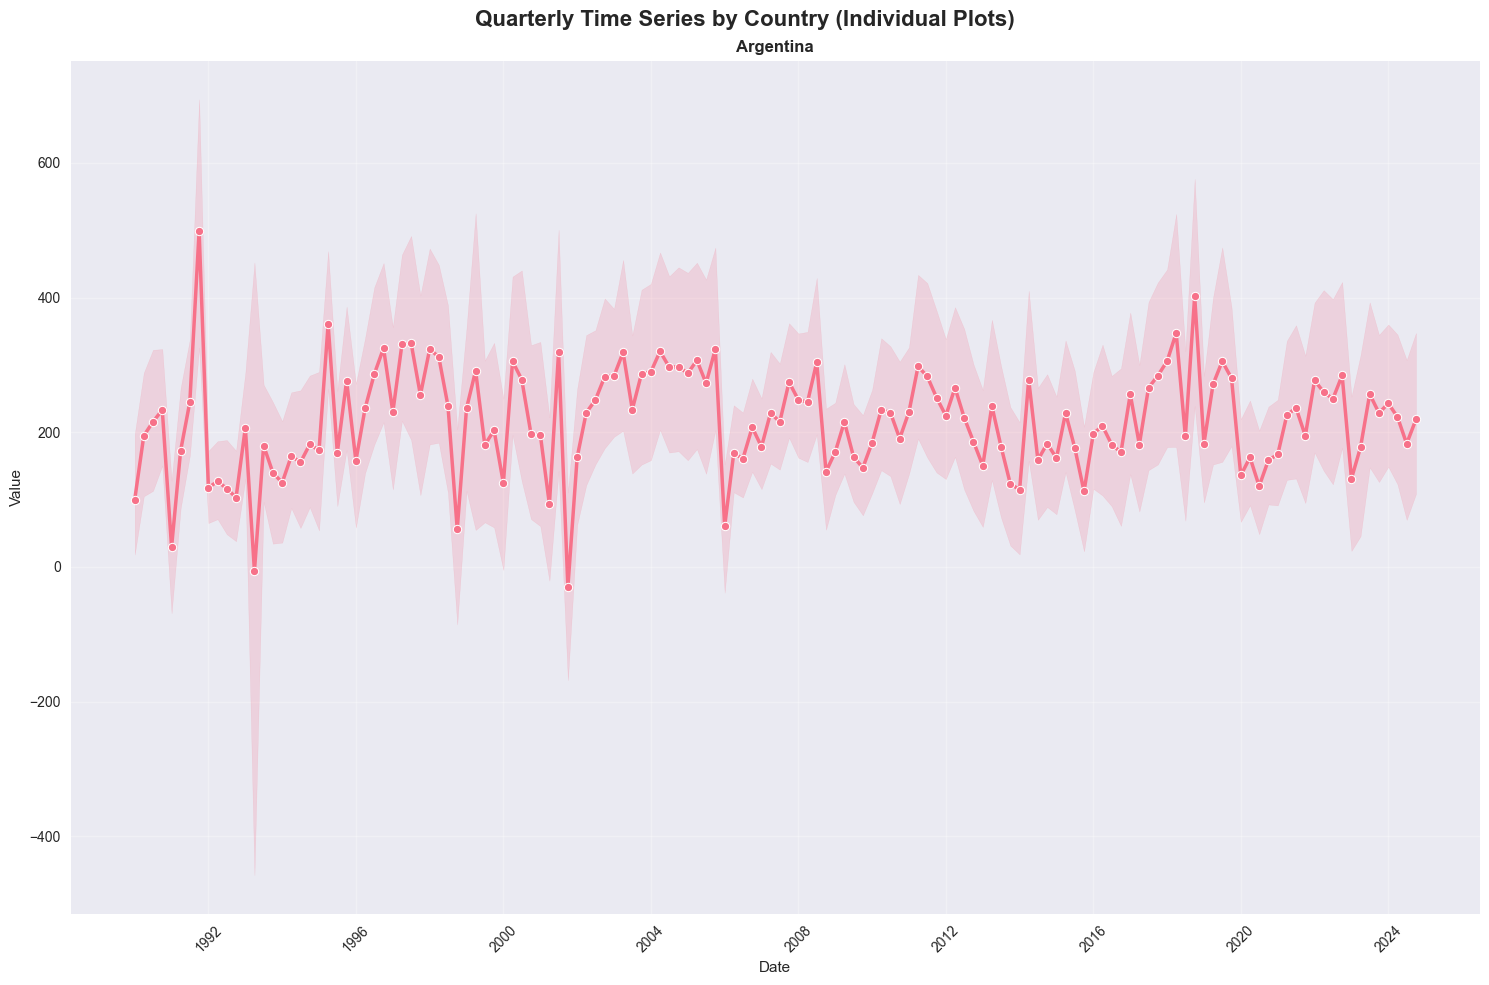

In [27]:
def create_seaborn_facet_plot(df, figsize=(15, 10)):
    """
    Create a faceted time series plot using seaborn
    """
    # Calculate number of countries for subplot arrangement
    n_countries = df['COUNTRY'].nunique()
    cols = min(3, n_countries)
    rows = (n_countries + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharex=True, sharey=True)
    
    if n_countries == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    countries = df['COUNTRY'].unique()
    
    for i, country in enumerate(countries):
        country_data = df[df['COUNTRY'] == country]
        
        if i < len(axes):
            sns.lineplot(data=country_data, x='Date', y='Value', 
                        marker='o', markersize=6, linewidth=2.5, 
                        ax=axes[i], color=f'C{i}')
            axes[i].set_title(f'{country}', fontweight='bold', fontsize=12)
            axes[i].grid(True, alpha=0.3)
            axes[i].tick_params(axis='x', rotation=45)
    
    # Hide unused subplots
    for i in range(n_countries, len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('Quarterly Time Series by Country (Individual Plots)', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

# Create seaborn facet plot
create_seaborn_facet_plot(processed_df)
